<a href="https://colab.research.google.com/github/sanay21/machine-learning-projects/blob/main/logistic_regression_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df=sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


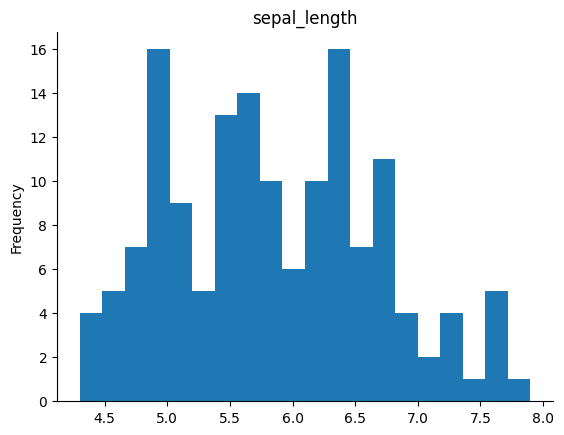

In [3]:
# @title sepal_length

from matplotlib import pyplot as plt
df['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df=df[df['species']!='setosa']


In [5]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

<ipython-input-5-3b1decd9eb86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].map({'versicolor':0,'virginica':1})


In [6]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
y,X

(50     0
 51     0
 52     0
 53     0
 54     0
       ..
 145    1
 146    1
 147    1
 148    1
 149    1
 Name: species, Length: 100, dtype: int64,
      sepal_length  sepal_width  petal_length  petal_width
 50            7.0          3.2           4.7          1.4
 51            6.4          3.2           4.5          1.5
 52            6.9          3.1           4.9          1.5
 53            5.5          2.3           4.0          1.3
 54            6.5          2.8           4.6          1.5
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [100 rows x 4 columns])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the Logistic Regression classifier
classifier = LogisticRegression()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print the accuracy score
print('accuracy is', accuracy_score(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

[[13  1]
 [ 1 10]]
accuracy is 0.92
accuracy is 0.92


In [13]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [14]:
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [15]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [16]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [17]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [18]:
print(classifier_regressor.best_score_)

0.9733333333333334


In [19]:
y_pred=classifier_regressor.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.92
